<a href="https://colab.research.google.com/github/rko7/Kaggle_ML-Project/blob/main/Machine_Learning_Project_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
# load the dataset to pandas Dataframe
df = pd.read_csv("/content/car data.csv")

In [3]:
# Printing the first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# number of rows and columns
df.shape

(301, 9)

In [5]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# number of missing values in each column
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# check the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
# label encoding
df.replace({"Fuel_Type":{'Petrol': 0,'Diesel': 1,'CNG': 2},"Seller_Type":{'Dealer': 0,'Individual': 1},"Transmission":{'Manual': 0,'Automatic': 1}}, inplace = True)

In [9]:
# check if the data has changed correctly
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


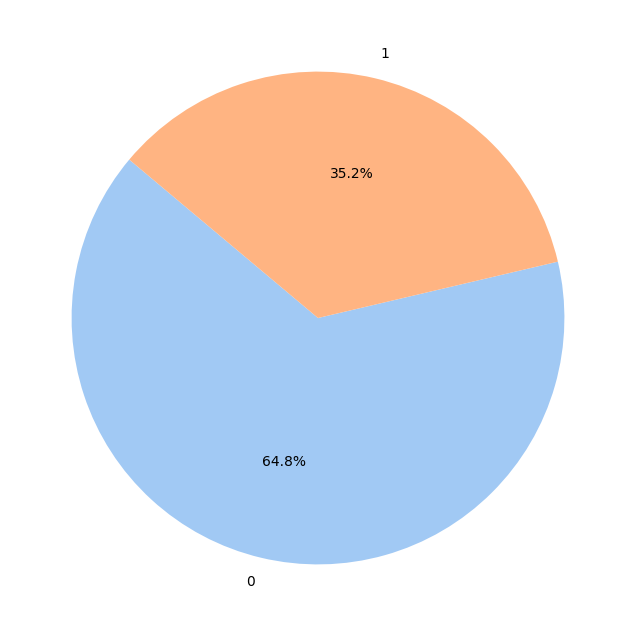

In [10]:
# distribution of cars by seller type
seller_counts = df['Seller_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.show()

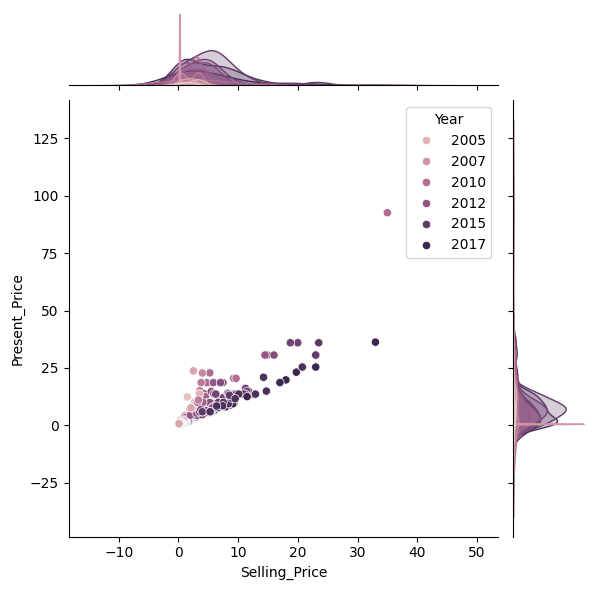

In [11]:
# relationship Between Selling Price and Present Price of Cars by Year
sns.jointplot(x = 'Selling_Price', y = 'Present_Price', data = df, hue = 'Year')

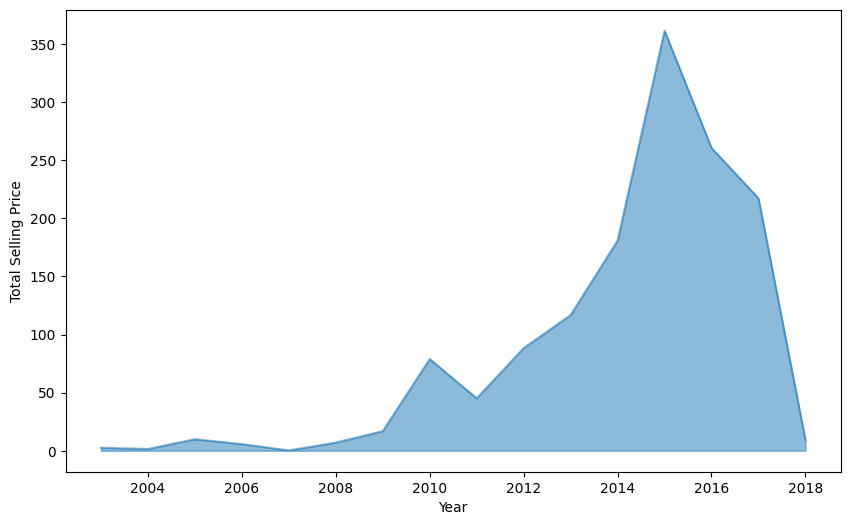

In [12]:
# distribution of car prices over the years
plt.figure(figsize=(10, 6))
df.groupby('Year')['Selling_Price'].sum().plot(kind='area', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.show()

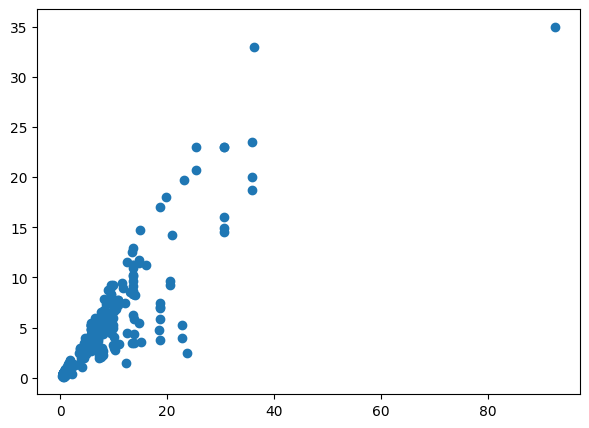

In [13]:
# correlation between present price and selling price
fig=plt.figure(figsize=(7,5))
plt.scatter('Present_Price', 'Selling_Price', data = df)

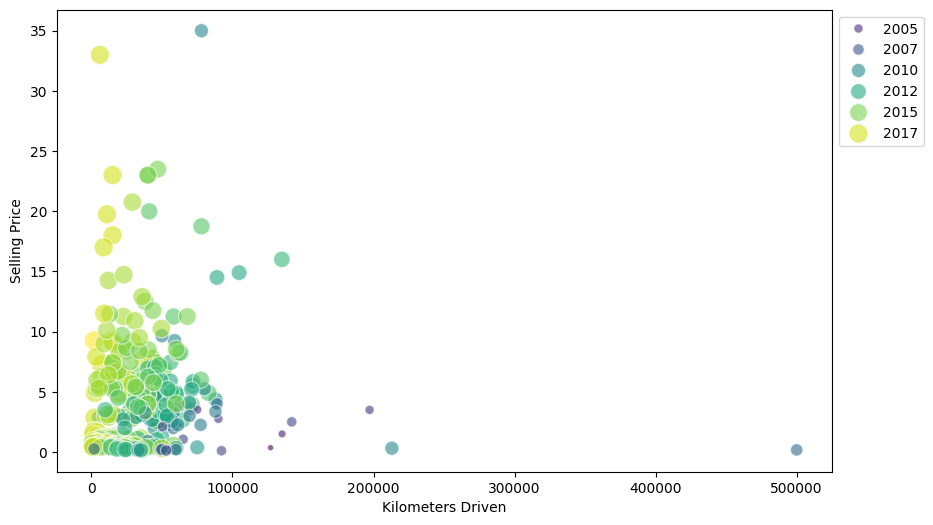

In [14]:
# relationship between kilometers driven, selling price, and year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kms_Driven', y='Selling_Price', size='Year', sizes=(20, 200), hue='Year', alpha=0.6, palette='viridis')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Splitting the data and Target

In [15]:
# separate the data and corresponding label & Drop the unnecessary columns (Loan ID, Loan Status)
X = df.drop(columns = ['Car_Name', 'Selling_Price'], axis = 1)
Y = df['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Split Training & Test Data

In [16]:
# split the data into training data and test data (X represents data, Y represents label)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

Model Training

  1. Linear Regression

In [17]:
# load the linear regression model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [19]:
# prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8799451660493711


Visualize the Actual Prices and Predicted Prices

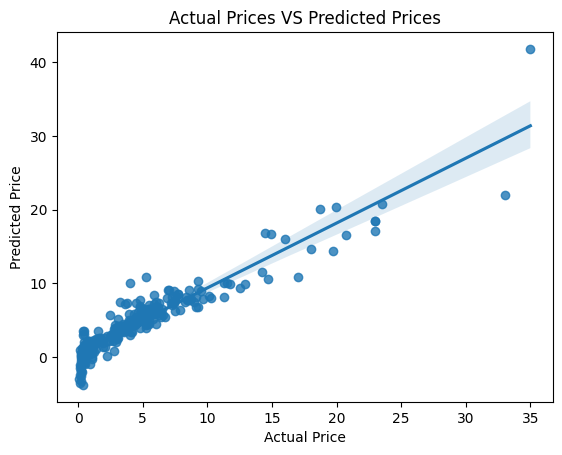

In [21]:
sns.regplot(x = Y_train, y = training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [22]:
# prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [23]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8365766715027051


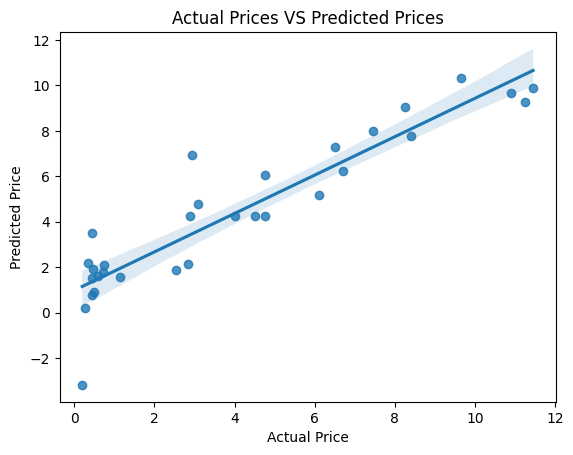

In [24]:
sns.regplot(x = Y_test, y = test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

  2. Lasso Regression

In [25]:
# load the lasso regression model
lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [27]:
# prediction on Training Data
training_data_prediction = lass_reg_model.predict(X_train)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8427856123435794


Visualize the Actual Prices and Predicted Prices

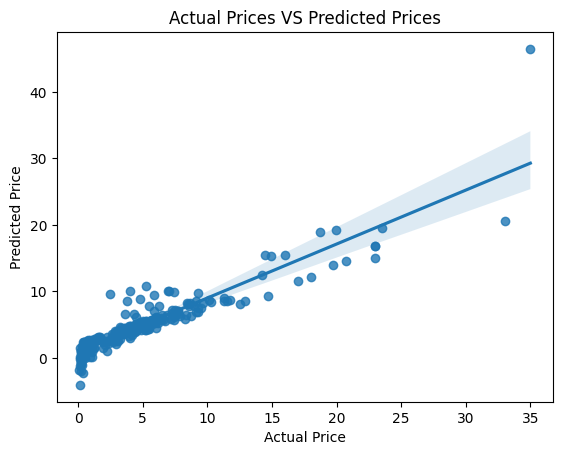

In [29]:
sns.regplot(x = Y_train, y = training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [30]:
# prediction on Test Data
test_data_prediction = lass_reg_model.predict(X_test)

In [31]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8709167941173195


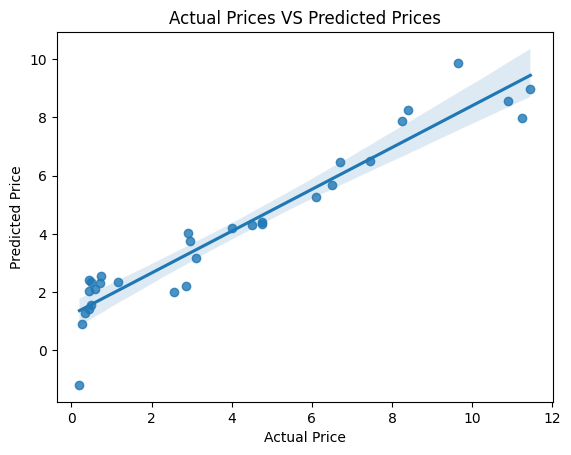

In [32]:
sns.regplot(x = Y_test, y = test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()